In [ ]:
!pip install pulp
import pulp

# ----------------------------
# 1. Create the LP problem
# ----------------------------
model = pulp.LpProblem("MultiMaterial_Procurement", pulp.LpMinimize)

# ----------------------------
# 2. Define Decision Variables
#   x_AC: Cement from Supplier A
#   x_AS: Steel  from Supplier A
#   x_BC: Cement from Supplier B
#   x_BS: Steel  from Supplier B
#   x_CC: Cement from Supplier C
#   x_CS: Steel  from Supplier C
# ----------------------------
x_AC = pulp.LpVariable('x_AC', lowBound=0, cat='Continuous')
x_AS = pulp.LpVariable('x_AS', lowBound=0, cat='Continuous')
x_BC = pulp.LpVariable('x_BC', lowBound=0, cat='Continuous')
x_BS = pulp.LpVariable('x_BS', lowBound=0, cat='Continuous')
x_CC = pulp.LpVariable('x_CC', lowBound=0, cat='Continuous')
x_CS = pulp.LpVariable('x_CS', lowBound=0, cat='Continuous')

# ----------------------------
# 3. Objective Function
#   Minimize cost =
#     70*x_AC + 120*x_AS +
#     75*x_BC + 115*x_BS +
#     72*x_CC + 125*x_CS
# ----------------------------
model += (
    70*x_AC + 120*x_AS +
    75*x_BC + 115*x_BS +
    72*x_CC + 125*x_CS
), "Total_Cost"

# ----------------------------
# 4. Constraints
# ----------------------------

# 4.1 Demand Constraints
# Cement: x_AC + x_BC + x_CC >= 900
model += x_AC + x_BC + x_CC >= 900, "CementDemand"

# Steel: x_AS + x_BS + x_CS >= 400
model += x_AS + x_BS + x_CS >= 400, "SteelDemand"

# 4.2 Supplier Capacity
# Supplier A capacity: x_AC <= 500, x_AS <= 200
model += x_AC <= 500, "SupplierA_CementCap"
model += x_AS <= 200, "SupplierA_SteelCap"

# Supplier B capacity: x_BC <= 400, x_BS <= 300
model += x_BC <= 400, "SupplierB_CementCap"
model += x_BS <= 300, "SupplierB_SteelCap"

# Supplier C capacity: x_CC <= 600, x_CS <= 250
model += x_CC <= 600, "SupplierC_CementCap"
model += x_CS <= 250, "SupplierC_SteelCap"

# 4.3 Storage Constraint
# (x_AC + x_AS) + (x_BC + x_BS) + (x_CC + x_CS) <= 1000
model += (x_AC + x_AS) + (x_BC + x_BS) + (x_CC + x_CS) <= 1000, "StorageLimit"

# ----------------------------
# 5. Solve the LP
# ----------------------------
model.solve()

# ----------------------------
# 6. Display Results
# ----------------------------
print(f"Status: {pulp.LpStatus[model.status]}")
print("Decision Variables:")
for var in [x_AC, x_AS, x_BC, x_BS, x_CC, x_CS]:
    print(f"  {var.name} = {var.varValue:0.2f}")

print(f"Total Cost = ${pulp.value(model.objective):0.2f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.2 MB/s eta 0:00:00
Status: Infeasible
Decision Variables:
  x_AC = 500.00
  x_AS = 100.00
  x_BC = 0.00
  x_BS = 300.00
  x_CC = 400.00
  x_CS = 0.00
Total Cost = $110300.00


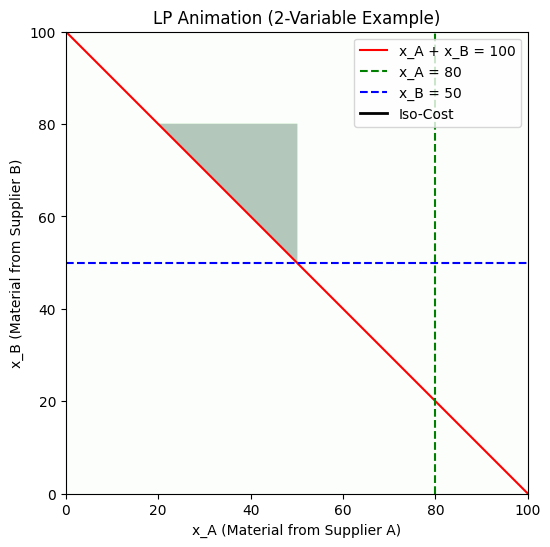

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------------
# Simplified Example Constraints:
#   Minimize: Cost = 5x_A + 6x_B
#   Subject to:
#       1) x_A + x_B >= 100
#       2) x_A <= 80
#       3) x_B <= 50
#       4) x_A, x_B >= 0
# ------------------------------

# 1. Setup figure
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel("x_A (Material from Supplier A)")
ax.set_ylabel("x_B (Material from Supplier B)")
ax.set_title("LP Animation (2-Variable Example)")

# 2. Plot constraints as lines
# 2.1 x_A + x_B = 100  => x_B = 100 - x_A
xA_vals = np.linspace(0, 100, 200)
line_xB_demand = 100 - xA_vals
ax.plot(xA_vals, line_xB_demand, 'r-', label="x_A + x_B = 100")

# 2.2 x_A = 80 (vertical line)
ax.axvline(x=80, color='g', linestyle='--', label="x_A = 80")
# 2.3 x_B = 50 (horizontal line)
ax.axhline(y=50, color='b', linestyle='--', label="x_B = 50")

# 3. Feasible region shading
#    x_A + x_B >= 100 => region above line_xB_demand
#    x_A <= 80 => region left of x=80
#    x_B <= 50 => region below y=50
X, Y = np.meshgrid(np.linspace(0, 100, 300), np.linspace(0, 100, 300))
feasible = (X + Y >= 100) & (X <= 80) & (Y <= 50)
ax.imshow(feasible.T, origin='lower',
          extent=(0,100,0,100),
          cmap='Greens', alpha=0.3)

# 4. Prepare iso-cost line for animation:  5x_A + 6x_B = cost
iso_line, = ax.plot([], [], 'k-', linewidth=2, label='Iso-Cost')

# Add legend
ax.legend(loc='upper right')

def init():
    """Initialize animation background."""
    iso_line.set_data([], [])
    return (iso_line,)

def animate(i):
    """
    For each frame i, adjust the cost value
    so the iso-cost line slides across the feasible region.
    """
    # Let's start from a high cost and move down.
    cost = 1100 - 10*i  # 1100, 1090, 1080, ...

    # 5x_A + 6x_B = cost  => x_B = (cost - 5x_A)/6
    xB_vals = (cost - 5*xA_vals) / 6

    # For plot clarity, we can clip negative values
    xB_vals_clipped = np.where(xB_vals >= 0, xB_vals, np.nan)

    iso_line.set_data(xA_vals, xB_vals_clipped)
    return (iso_line,)

anim = FuncAnimation(fig, animate, init_func=init,
                     frames=60, interval=200, blit=True)

plt.show()
